In [88]:
import numpy as np
import pandas as pd
df=pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [89]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1439,ham,In fact when do you leave? I think addie goes ...,NaN,NaN,NaN
2114,spam,Sunshine Hols. To claim ur med holiday send a ...,NaN,NaN,NaN
2442,ham,I donno if they are scorable,NaN,NaN,NaN
416,ham,Alright i have a new goal now,NaN,NaN,NaN
1497,ham,I'm putting it on now. It should be ready for ...,NaN,NaN,NaN


In [90]:
df.shape

(5572, 5)

# Steps

## 1. Data Cleaning
## 2. EDA exploratory Data Analysis 
## 3. Test preprocessing 
## 4. Model Building 
## 5. Evaluation
## 6. Improvement 
## 7. Website and Deployment 

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [92]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [93]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [94]:
## renaming the columns
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [95]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [96]:
df['target']=encoder.fit_transform(df['target'])

In [97]:
df.head()
#0 == ham
# 1== spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [98]:
#missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [99]:
## duplicate values 
df.duplicated().sum()

403

In [100]:
df=df.drop_duplicates(keep='first')

In [101]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [102]:
df.shape

(5169, 2)

### EDA

In [103]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

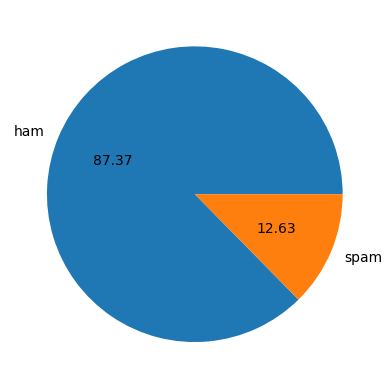

In [104]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [105]:
import nltk
# natural lang toolkit
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/kalyani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [106]:
df['num_characters']=df['text'].apply(len)

In [107]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [108]:
#number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [109]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [110]:
# number of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [111]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [112]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [113]:
#for ham msges
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [114]:
#for spam msges
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

<Axes: xlabel='num_characters', ylabel='Count'>

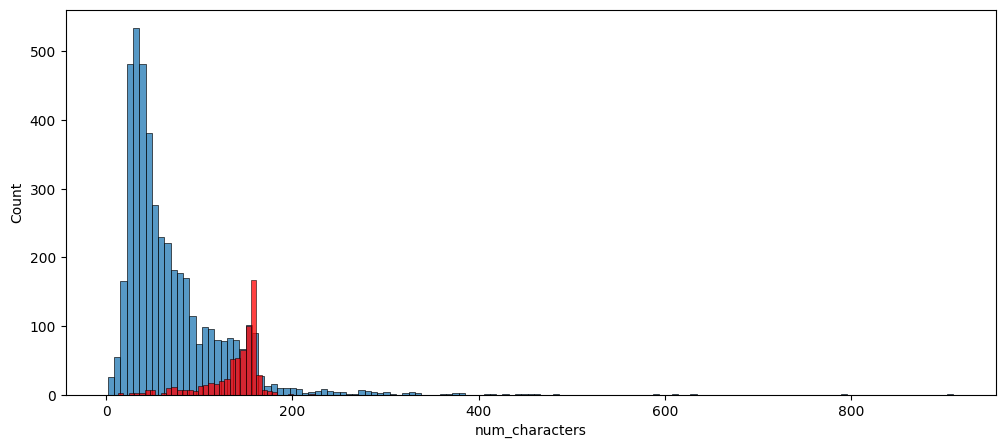

In [115]:
import seaborn as sns 
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

<Axes: xlabel='num_words', ylabel='Count'>

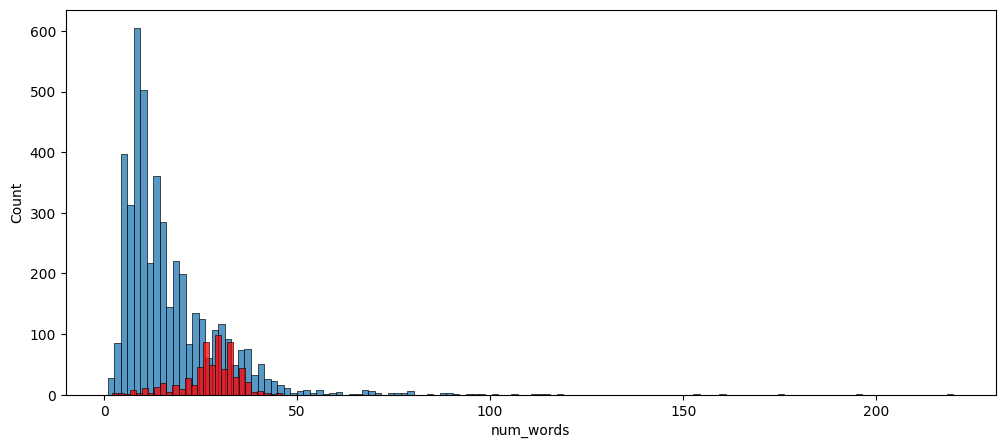

In [116]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

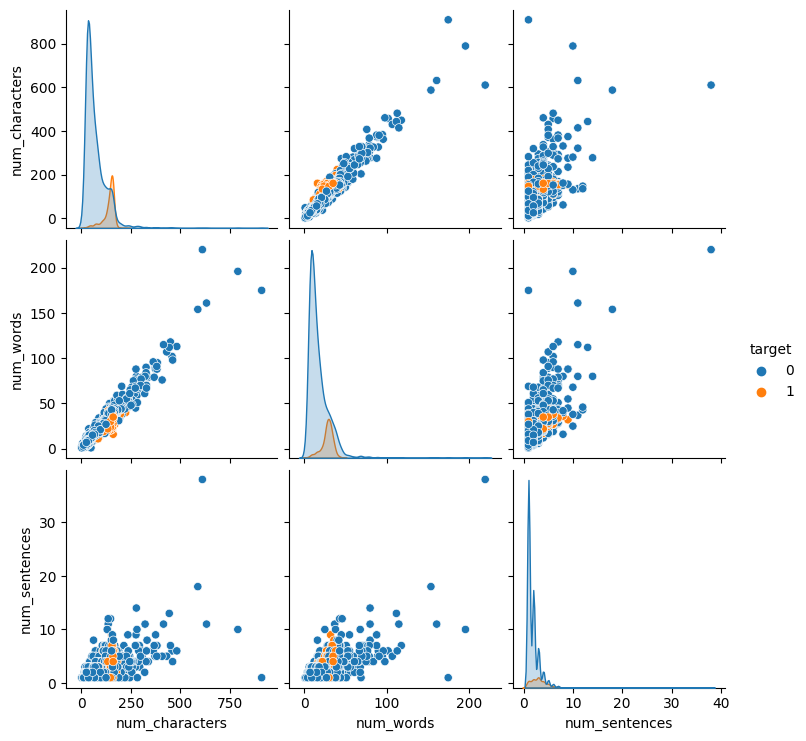

In [117]:
sns.pairplot(df,hue='target')

In [118]:
df.corr(numeric_only = True)

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

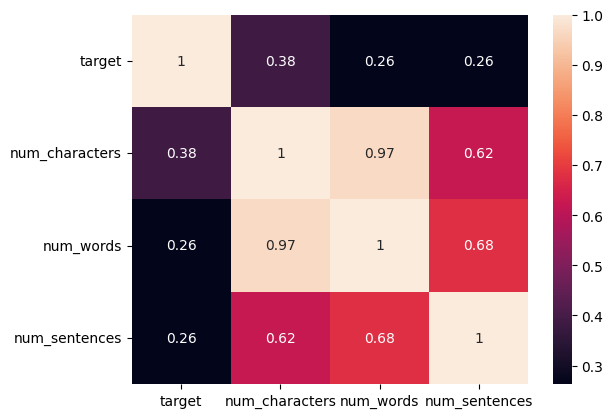

In [119]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## 3. Data PreProcessing 
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming 

In [120]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
                                    y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [121]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [122]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [123]:
transform_text("Hi, How are you nimish. Did you liked my presenetation?")

'hi nimish like presenet'

In [124]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [125]:
transform_text(df['text'][331])

'mayb could get book tomo return immedi someth'

In [126]:
df['transformed_text']=df['text'].apply(transform_text)

In [127]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [128]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [129]:
## word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wc = WordCloud(width=1500,height=1500,min_font_size=10,background_color='white')

In [130]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

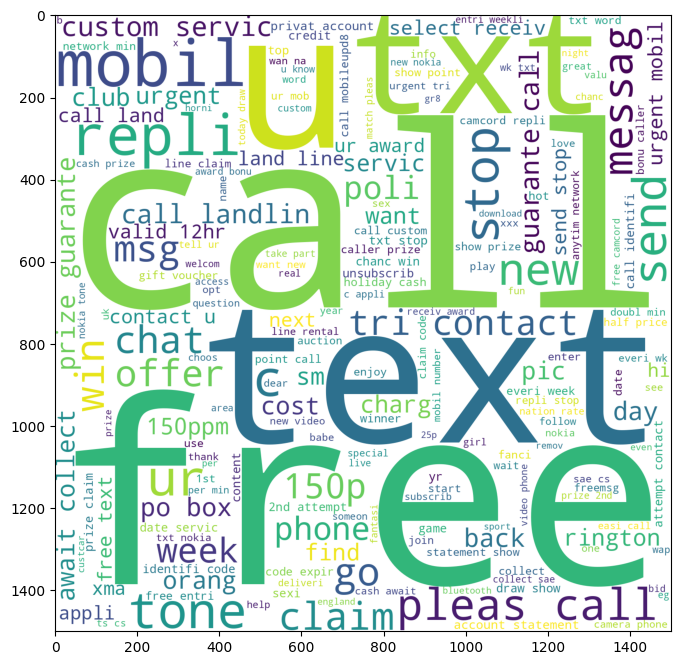

In [131]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

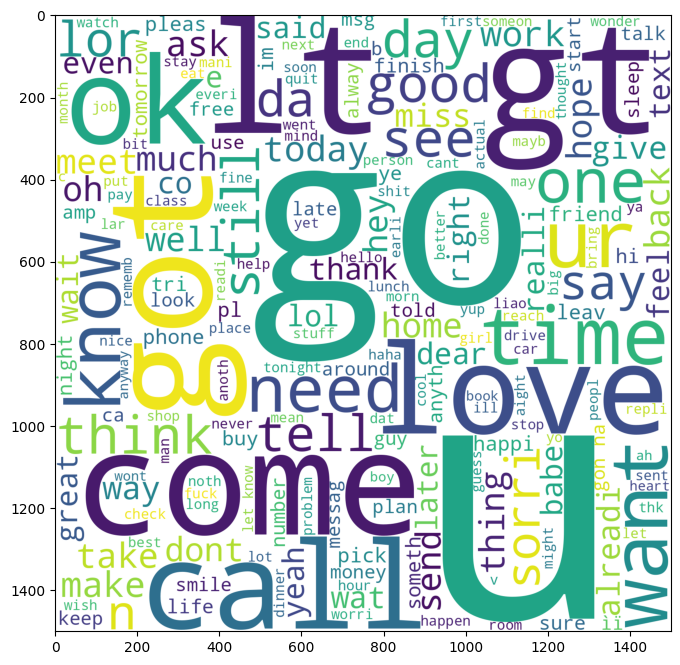

In [132]:
spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

In [133]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [134]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [135]:
len(spam_corpus)

9939

/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


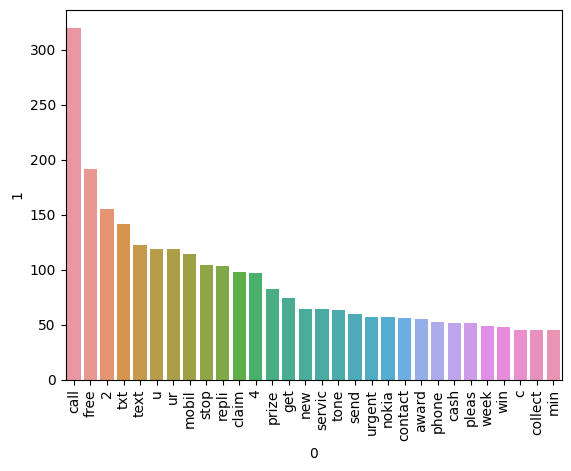

In [136]:
from collections import Counter 
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


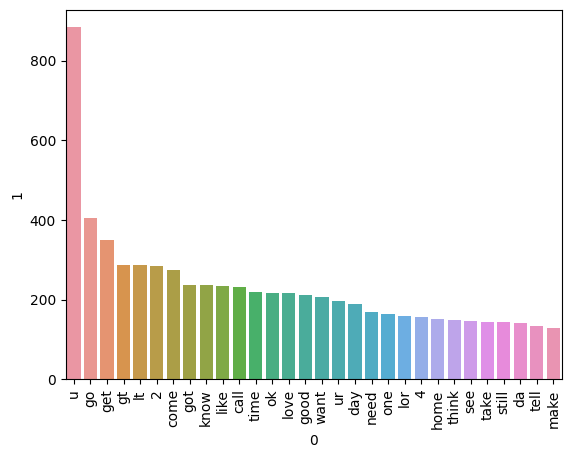

In [137]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building 
### For textual data naive bayes is considereed as good 

In [138]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

#x=cv.fit_transform(df['transformed_text']).toarray()
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [139]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# x=scaler.fit_transform(x)
x=np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [140]:
x.shape

(5169, 3001)

In [141]:
y=df['target'].values

In [142]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [143]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [144]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [145]:
gnb.fit(xTrain,yTrain)
y_pred1=gnb.predict(xTest)
print(accuracy_score(yTest,y_pred1))
print(confusion_matrix(yTest,y_pred1))
print(precision_score(yTest,y_pred1))

0.8907156673114119
[[807  89]
 [ 24 114]]
0.5615763546798029


In [146]:
mnb.fit(xTrain,yTrain)
y_pred2=mnb.predict(xTest)
print(accuracy_score(yTest,y_pred2))
print(confusion_matrix(yTest,y_pred2))
print(precision_score(yTest,y_pred2))

0.9410058027079303
[[896   0]
 [ 61  77]]
1.0


In [147]:
bnb.fit(xTrain,yTrain)
y_pred3=bnb.predict(xTest)
print(accuracy_score(yTest,y_pred3))
print(confusion_matrix(yTest,y_pred3))
print(precision_score(yTest,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


## tfidf -> mnb

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier 

In [149]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)

In [150]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt
}

In [151]:
def train_classifier(clf,xTrain,yTrain,xTest,yTest):
    clf.fit(xTrain,yTrain)
    y_pred=clf.predict(xTest)
    accuracy=accuracy_score(yTest,y_pred)
    precision=precision_score(yTest,y_pred)
    return accuracy,precision

In [152]:
train_classifier(svc,xTrain,yTrain,xTest,yTest)

/home/kalyani/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8665377176015474, 0.0)

In [153]:
acc_scores=[]
prec_scores=[]
for name,clf in clfs.items():
    currAccuracy,currPrecision=train_classifier(clf,xTrain,yTrain,xTest,yTest)
    print("For:",name)
    print("Accuracy:",currAccuracy)
    print("Precision:",currPrecision)

    acc_scores.append(currAccuracy)
    prec_scores.append(currPrecision)

/home/kalyani/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For: SVC
Accuracy: 0.8665377176015474
Precision: 0.0
For: KN
Accuracy: 0.9323017408123792
Precision: 0.8148148148148148
For: NB
Accuracy: 0.9410058027079303
Precision: 1.0
For: DT
Accuracy: 0.9516441005802708
Precision: 0.8283582089552238
For: LR
Accuracy: 0.9613152804642167
Precision: 0.9622641509433962
For: RF
Accuracy: 0.9690522243713733
Precision: 0.9818181818181818
For: AdaBoost
Accuracy: 0.9642166344294004
Precision: 0.9316239316239316
For: BgC
Accuracy: 0.9661508704061895
Precision: 0.8992248062015504
For: ETC
Accuracy: 0.9787234042553191
Precision: 0.9754098360655737
For: GBDT
Accuracy: 0.9516441005802708
Precision: 0.9313725490196079


In [154]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':acc_scores,'Precision':prec_scores}).sort_values('Precision',ascending=False)


In [155]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.941006,1.000000
5,RF,0.969052,0.981818
8,ETC,0.978723,0.975410
4,LR,0.961315,0.962264
6,AdaBoost,0.964217,0.931624
9,GBDT,0.951644,0.931373
7,BgC,0.966151,0.899225
3,DT,0.951644,0.828358
1,KN,0.932302,0.814815
0,SVC,0.866538,0.000000


In [156]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')

In [157]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.941006
1,RF,Accuracy,0.969052
2,ETC,Accuracy,0.978723
3,LR,Accuracy,0.961315
4,AdaBoost,Accuracy,0.964217
5,GBDT,Accuracy,0.951644
6,BgC,Accuracy,0.966151
7,DT,Accuracy,0.951644
8,KN,Accuracy,0.932302
9,SVC,Accuracy,0.866538


/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kalyani/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

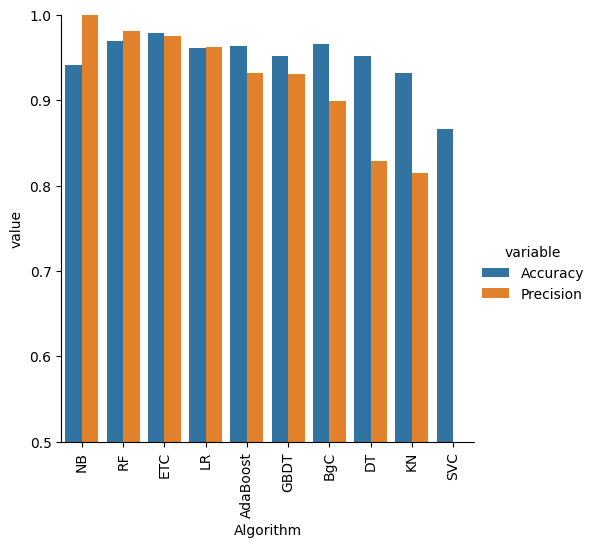

In [158]:
sns.catplot(x='Algorithm',y='value',
            hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [159]:
#model improce 
# 1. change the max features of parameter Tfidf

In [160]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':acc_scores,'Precision_max_ft_3000':prec_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [161]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':acc_scores,'Precision_scaling':prec_scores}).sort_values('Precision_scaling',ascending=False)

In [162]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':acc_scores,'Precision_num_chars':prec_scores}).sort_values('Precision_num_chars',ascending=False)

In [163]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.941006,1.000000,0.941006,1.000000,0.941006,1.000000,0.941006,1.000000
1,RF,0.969052,0.981818,0.969052,0.981818,0.969052,0.981818,0.969052,0.981818
2,ETC,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410
3,LR,0.961315,0.962264,0.961315,0.962264,0.961315,0.962264,0.961315,0.962264
4,AdaBoost,0.964217,0.931624,0.964217,0.931624,0.964217,0.931624,0.964217,0.931624
5,GBDT,0.951644,0.931373,0.951644,0.931373,0.951644,0.931373,0.951644,0.931373
6,BgC,0.966151,0.899225,0.966151,0.899225,0.966151,0.899225,0.966151,0.899225
7,DT,0.951644,0.828358,0.951644,0.828358,0.951644,0.828358,0.951644,0.828358
8,KN,0.932302,0.814815,0.932302,0.814815,0.932302,0.814815,0.932302,0.814815
9,SVC,0.866538,0.000000,0.866538,0.000000,0.866538,0.000000,0.866538,0.000000


In [164]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [166]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(xTrain,yTrain)
mnb.fit(xTrain,yTrain)

MultinomialNB()

In [167]:
y_pred = voting.predict(xTest)
print("Accuracy",accuracy_score(yTest,y_pred))
print("Precision",precision_score(yTest,y_pred))

Accuracy 0.941972920696325
Precision 1.0


In [168]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [169]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(xTrain,yTrain)
y_pred = clf.predict(xTest)
print("Accuracy",accuracy_score(yTest,y_pred))
print("Precision",precision_score(yTest,y_pred))

Accuracy 0.9690522243713733
Precision 0.8785714285714286


In [170]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))